In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [26]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [27]:

df.shape

(768, 9)

In [28]:
#Checking for any null values
#no null values found
# however, there are attribute value 0 found for various columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# EDA of the dataset

In [29]:
# Bias in the data

#Population age = 21 year olds

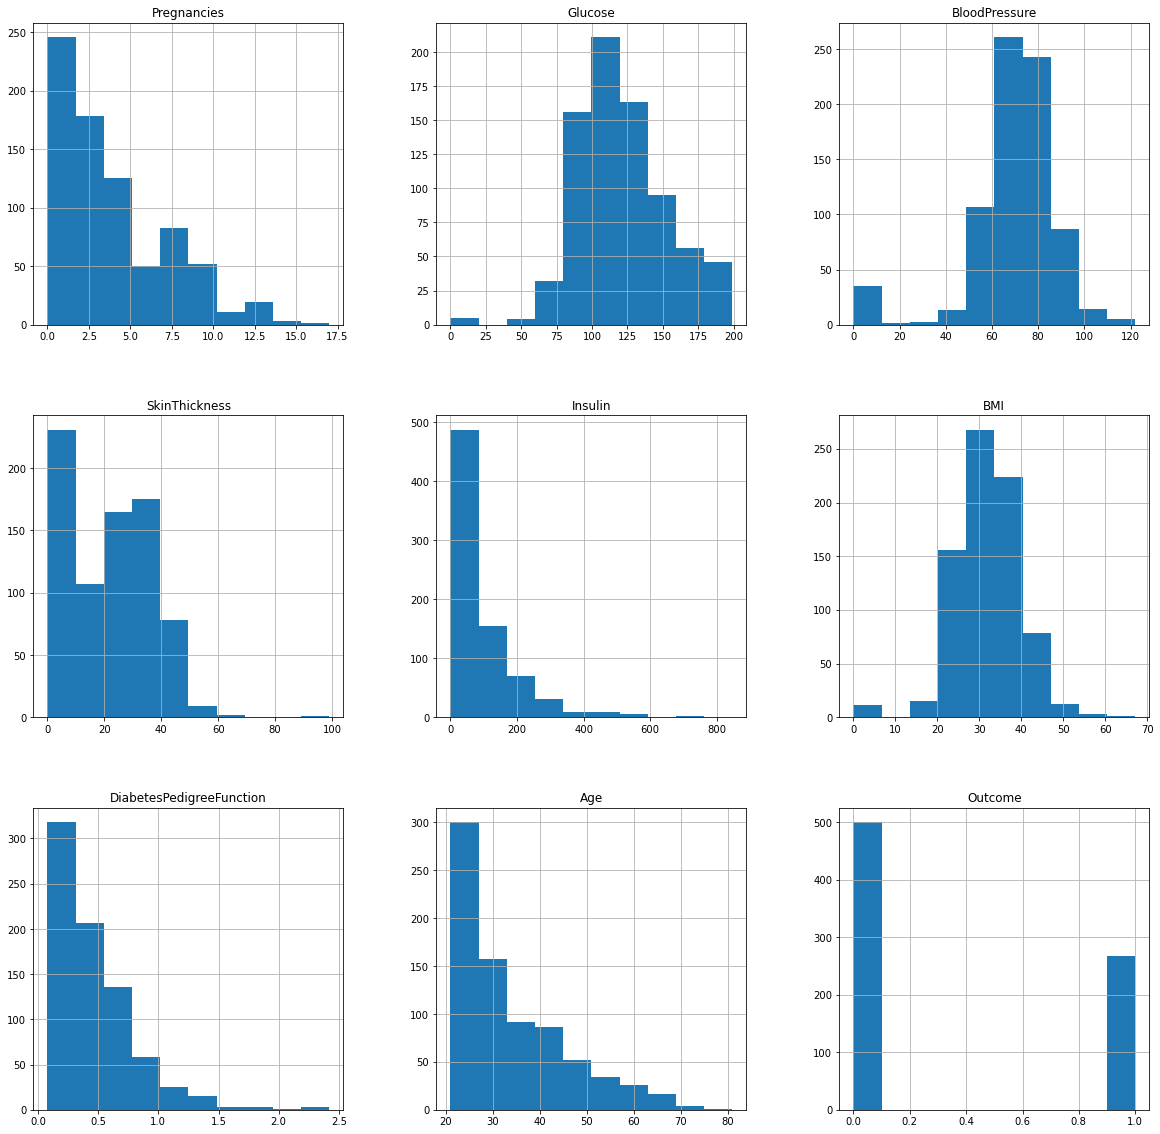

In [30]:
hplot = df.hist(figsize = (20,20))

In [31]:
# check the minimum and maximum values
# minimum for columns glucose to BMI containing 0 attribute values need to be explored
# if null values are to be ignored, how many of them are there within this dataset?
summary = df.describe()

summary

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [32]:
df['Outcome'].value_counts()
#Print ('Proportion_of_Diabetes_Patients_dataset') = 268/768

0    500
1    268
Name: Outcome, dtype: int64

# Data cleaning

In [33]:
#df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
#df.iloc[:, 1:6].replace(0, df.mean(axis =0), inplace =True)


df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

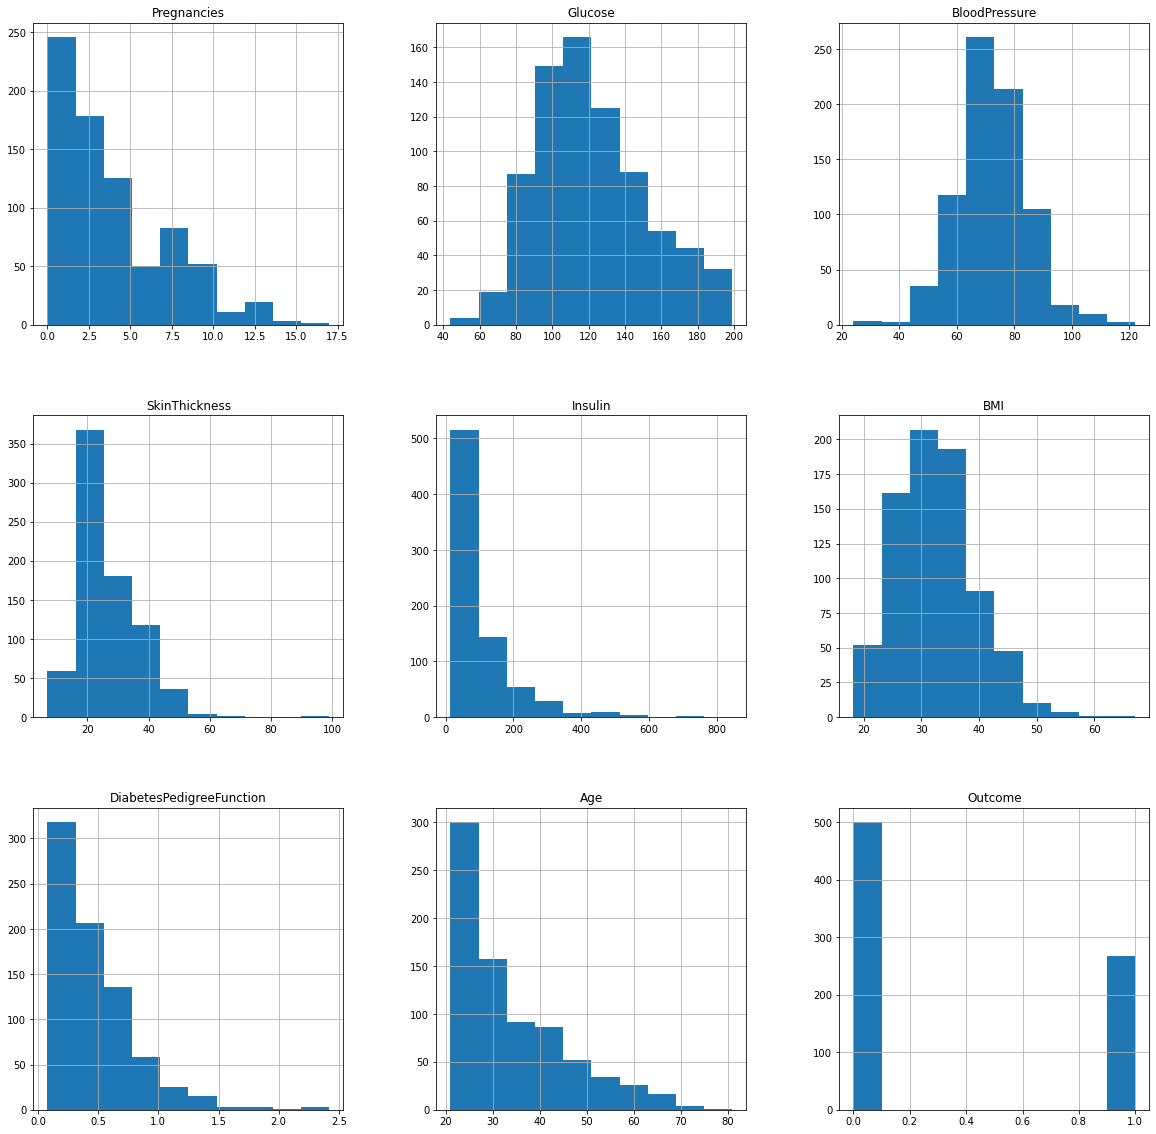

In [34]:
hplot = df.hist(figsize = (20,20))

Text(0.5, 1.0, 'Boxplot distribution for diabetes related attributes')

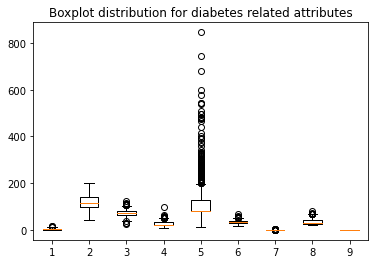

In [35]:
#boxplot the attributes
df1 = df.iloc[:, 0:9]
plt.boxplot(df1)
plt.title('Boxplot distribution for diabetes related attributes')



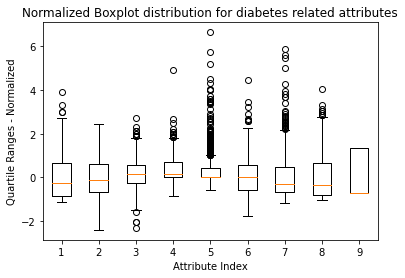

In [36]:
#normalize data for boxplot

df_normalized = df.iloc [:, 0:9]

for i in range (9):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    df_normalized.iloc[:, i:(i+1)]=(df_normalized.iloc[:, i:(i+1)]- mean)/sd
    
df2 = df_normalized.values  
plt.boxplot(df2)
plt.xlabel('Attribute Index')
plt.ylabel(('Quartile Ranges - Normalized'))
plt.title('Normalized Boxplot distribution for diabetes related attributes')
plt.show()

# Correlation between every variable

In [37]:
#find correlation using heat map

corr_diabetes = df.iloc[:, 0:9].corr()

corr_diabetes




Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231478                  0.137106   
BloodPressure             0.010926  0.281231                  0.000371   
SkinThickness             0.240361  0.535703                  0.154961   
Insulin                   1.000000  0.189856                  0.157806   
BMI                       0.189856  1.000000                  0.153508   
DiabetesPedigreeFunction  0.157806  0.153508                  1.000000   
Age                       0.038652  0.025748                  0.033561   
Outcome                   0.179185  0.312254                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.026423  0.175026  
Insulin                   0.038652  0.179185  
BMI                       0.025748  0.312254  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

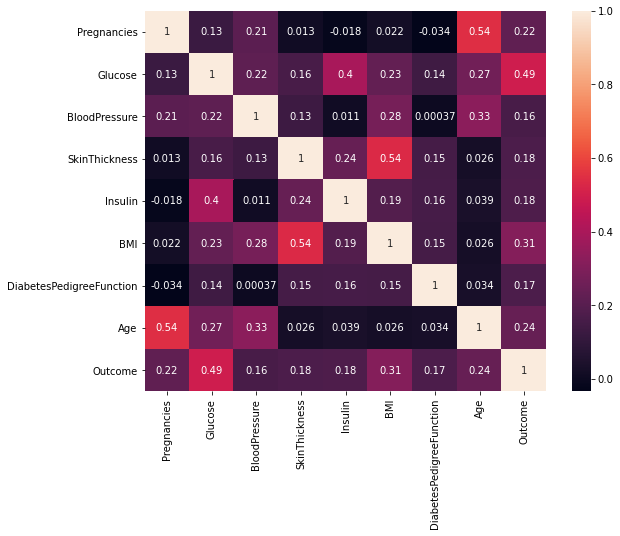

In [38]:

#Using heatmap to visualize correlations
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr_diabetes, annot =True)
plt.show()



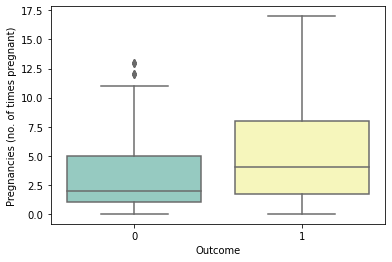

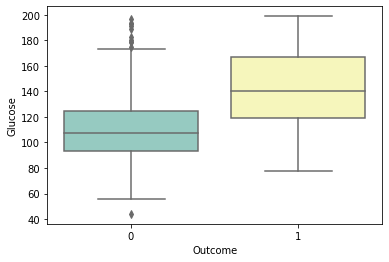

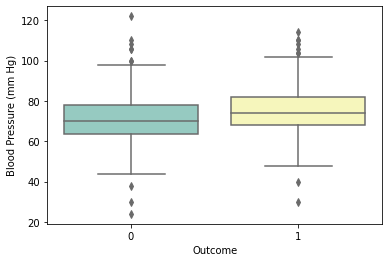

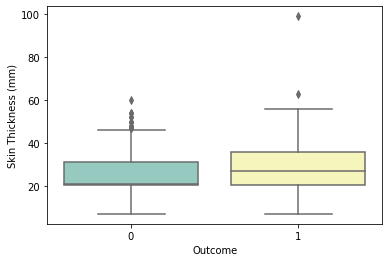

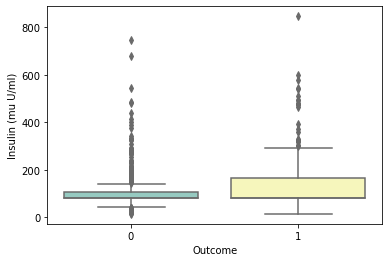

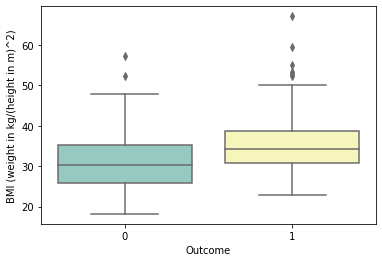

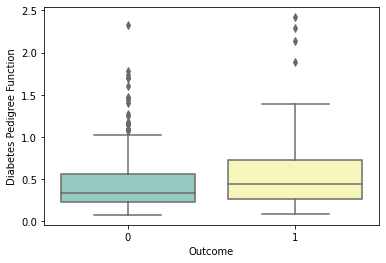

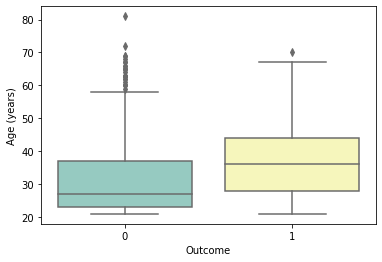

In [74]:
#create boxplot
#df.boxplot('SkinThickness', by='Outcome',figsize=(12,8))

ax2 = sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = df, palette = 'Set3')
plt.ylabel('Pregnancies (no. of times pregnant)')

plt.show()

ax3 = sns.boxplot(x = 'Outcome', y = 'Glucose', data = df, palette = 'Set3')

plt.show()


ax1 = sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df, palette = 'Set3')
plt.ylabel('Blood Pressure (mm Hg)')
plt.show()

ax1 = sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = df, palette = 'Set3')
plt.ylabel('Skin Thickness (mm)')
plt.show()

ax1 = sns.boxplot(x = 'Outcome', y = 'Insulin', data = df, palette = 'Set3')
plt.ylabel('Insulin (mu U/ml)')
plt.show()

ax1 = sns.boxplot(x = 'Outcome', y = 'BMI', data = df, palette = 'Set3')
plt.ylabel('BMI (weight in kg/(height in m)^2)')

plt.show()

ax1 = sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df, palette = 'Set3')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

ax1 = sns.boxplot(x = 'Outcome', y = 'Age', data = df, palette = 'Set3')
plt.ylabel('Age (years)')
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

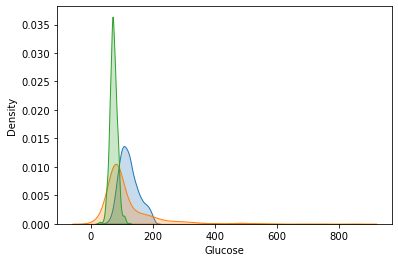

In [40]:
#Bivariate Seaborn Kdeplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['Glucose'], shade =True)
sns.kdeplot(df['Insulin'], shade = True)
sns.kdeplot(df['BloodPressure'], shade = True)



<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

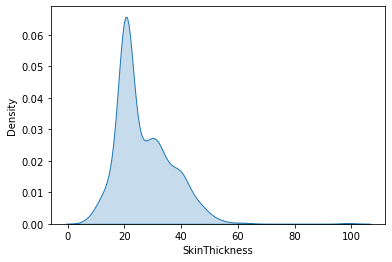

In [41]:
sns.kdeplot(df['SkinThickness'], shade = True)

# Linear Regression

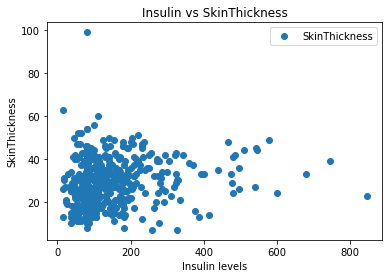

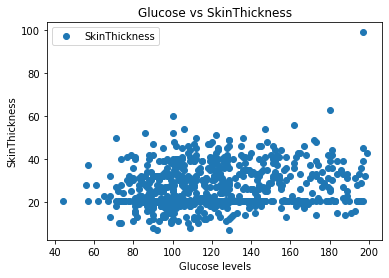

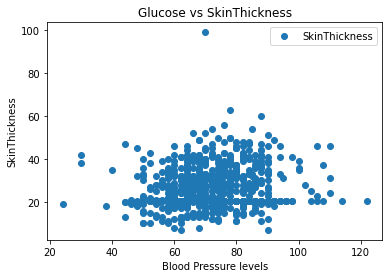

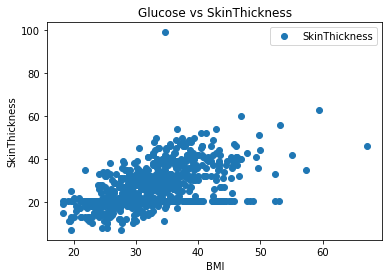

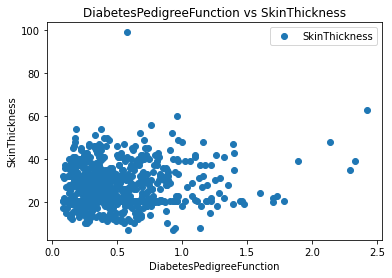

In [42]:
#plot

df.plot(x = 'Insulin', y = 'SkinThickness', style = 'o')
plt.title('Insulin vs SkinThickness')
plt.xlabel('Insulin levels')
plt.ylabel('SkinThickness')
plt.show()

df.plot(x = 'Glucose', y = 'SkinThickness', style = 'o')
plt.title('Glucose vs SkinThickness')
plt.xlabel('Glucose levels')
plt.ylabel('SkinThickness')
plt.show()


df.plot(x = 'BloodPressure', y = 'SkinThickness', style = 'o')
plt.title('Glucose vs SkinThickness')
plt.xlabel('Blood Pressure levels')
plt.ylabel('SkinThickness')
plt.show()


df.plot(x = 'BMI', y = 'SkinThickness', style = 'o')
plt.title('Glucose vs SkinThickness')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.show()


df.plot(x = 'DiabetesPedigreeFunction', y = 'SkinThickness', style = 'o')
plt.title('DiabetesPedigreeFunction vs SkinThickness')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('SkinThickness')
plt.show()

# T test - 2 sample

In [43]:
from bioinfokit.analys import stat
res = stat()
res.ttest(df = df, xfac = 'Outcome', res = 'SkinThickness', test_type =2, evar=False)
print(res.summary)

#result shows that p value<0.05, the t-test is significant 
#so the SkinThickness is significantly different for diabetic and non-diabetic people




Two sample t-test with unequal variance (Welch's t-test)

------------------  -------------
Mean diff            -3.53436
t                    -4.73048
Std Error             0.747145
df                  488.4
P-value (one-tail)    1.46821e-06
P-value (two-tail)    2.93642e-06
Lower 95.0%          -5.00237
Upper 95.0%          -2.06634
------------------  -------------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0       500  25.3731    9.03064     0.403863        24.5797        26.1666
      1       268  28.9075   10.2904      0.628587        27.6699        30.1451



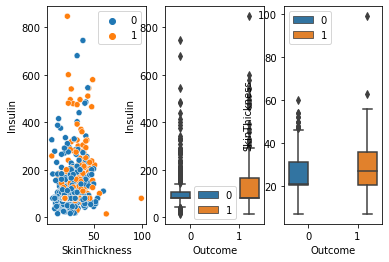

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df, x="SkinThickness", y="Insulin", hue=df.Outcome.tolist(), ax=axs[0])
sns.boxplot(data=df, x="Outcome", y="Insulin", hue=df.Outcome.tolist(), ax=axs[1])
sns.boxplot(data=df, x="Outcome", y="SkinThickness", hue=df.Outcome.tolist(), ax=axs[2])
plt.show()


In [45]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


# Multiple Linear Regression

In [46]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['SkinThickness']


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =0)

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
regressor.intercept_

2.624852820648492

In [50]:
regressor.coef_

array([ 8.72624932e-02, -1.36547646e-02, -1.27799551e-03,  1.32104742e-02,
        7.21585334e-01,  1.85245158e+00, -1.46522625e-02])

In [51]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

Coefficient
Pregnancies                  0.087262
Glucose                     -0.013655
BloodPressure               -0.001278
Insulin                      0.013210
BMI                          0.721585
DiabetesPedigreeFunction     1.852452
Age                         -0.014652

In [52]:
#Making Predictions
y_pred = regressor.predict(X_test)

In [63]:
df_Pred = pd.DataFrame({'Actual' : y_test,
                   'Predicted': y_pred})

df_Pred.head()

Actual  Predicted
661  43.000000  34.167857
122  30.000000  27.221449
113  20.536458  27.802997
14   19.000000  21.971317
529  20.536458  20.599690

In [54]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.127406935748444
Mean Squared Error: 61.82789511923388
Root Mean Squared Error: 7.863071608425926


# ANOVA

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ordinary least squares (OLS) model

model = ols('SkinThickness~ C(Outcome)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ= 2)

anova_table

sum_sq     df          F    PR(>F)
C(Outcome)   2179.539495    1.0  24.207276  0.000001
Residual    68967.992286  766.0        NaN       NaN

In [56]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [57]:
#use ANOVA bioinfokit to verify p value
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df = df, 
               res_var = 'SkinThickness', 
               anova_model = 'SkinThickness ~ C(Outcome)')
res.anova_summary

df        sum_sq      mean_sq          F    PR(>F)
C(Outcome)    1.0   2179.539495  2179.539495  24.207276  0.000001
Residual    766.0  68967.992286    90.036543        NaN       NaN

# p value < 0.05 which indicates that the p-value is significant. 
#Therefore, we reject the null hypothesis 
#There are significant differences in terms of skin thickness between diabetic and non-diabetic folks 

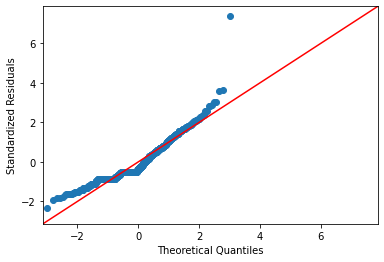

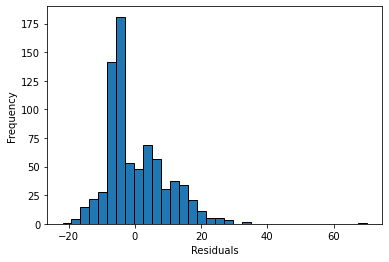

In [58]:
#QQ plot

import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(res.anova_std_residuals, line = '45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

#histogram
plt.hist(res.anova_model_out.resid, bins = 'auto', histtype = 'bar', ec = 'k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [59]:
#Residuals lying around the 45 degree line for the most part from 0 and up but below 0
#Histogram looks skewed

# Shapiro-Wilk Test - check normal distribution of residuals


In [60]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

if pvalue< 0.05:
    print('pvalue is significant. Therefore, we reject null hypothesis. Data is not drawn from normal distribution')
          
else:
    print('pvalue is not significant. Therefore, we fail to reject null hypothesis. Data is drawn from normal distribution')
          

0.9180508255958557 5.686125479925035e-20
pvalue is significant. Therefore, we reject null hypothesis. Data is not drawn from normal distribution


# Bartlett's test- check homogeneity of variances

In [61]:
from bioinfokit.analys import stat

res = stat()
res.bartlett(df= df, res_var = 'SkinThickness', xfac_var='Outcome')
res.bartlett_summary

#p value is less than 0.05 which means that it is significant. 
#We reject null hypothesis that skin thickness for diabetic and non-diabetic groups have equal variances

Parameter   Value
0      Test statistics (T)  6.0666
1  Degrees of freedom (Df)  1.0000
2                  p value  0.0138

# Levene's test - check homogeneity of variances

In [62]:
from bioinfokit.analys import stat
res = stat()
res.levene(df=df, 
          res_var ='SkinThickness',
          xfac_var = 'Outcome')
res.levene_summary

#pvalue <0.05. It is significant
# reject null
# the data drawn from non-normal distribution have unequal variances

Parameter   Value
0      Test statistics (W)  5.3456
1  Degrees of freedom (Df)  1.0000
2                  p value  0.0210